In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%aimport analyzers
%aimport processor
%aimport utils
%aimport forecast
%aimport models

plt.style.use('seaborn')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'w'

## Set up global parameters

In [16]:
# Predictions Locations
prediction_folder = '/Users/liyiheng/Google Drive/GroupWorks/Term4-AFP/forecasts/Predictions/'
RR_Prediction_Path = os.path.join(prediction_folder, 'RR_3d.csv')
GBM_Prediction_Path = os.path.join(prediction_folder, 'GBM_3d.csv')

# Analyzer Arguments
task = 'yahoo'
tickers = processor.YahooProcessor.get_all_tickers()
folder = None
freq = 'd'
fromdate = '2000-01-01'
todate = '2018-12-31'
forward_bars = 0
train_periods = ('2000-01-01', '2014-12-31')
test_periods = ('2015-01-01', '2018-12-31')

# Outlier Stocks
outliers = ['SAF', 'BHF', 'IHRTQ']

# Plot Arguments
return_type = '3 Days Forward Returns'

## Calculate RMSE etc. performance metrics

In [5]:
res_gbm_daily = analyzers.Analyzer().analyze(
    pred_path=GBM_Prediction_Path,
    train_periods=train_periods,
    test_periods=test_periods,
    rolling_metric='cum_abs_error',
    task = task,
    tickers = tickers,
    folder = None,
    freq = 'd',
    forward_bars = forward_bars,
    output_file=None)

2019-02-23 17:33:06,048 -  INFO   Loading Yahoo Labels...



2019-02-23 17:33:17,895 -  INFO   Loading Predictions Files From /Users/liyiheng/Google Drive/GroupWorks/Term4-AFP/forecasts/Predictions/GBM_3d.csv



2019-02-23 17:33:26,590 -  INFO   Task Finished: 602 Attempted and 0 Failed.


In [6]:
res_RR_daily = analyzers.Analyzer().analyze(
    pred_path=RR_Prediction_Path,
    train_periods=train_periods,
    test_periods=test_periods,
    rolling_metric='cum_abs_error',
    task = task,
    tickers = tickers,
    folder = None,
    freq = 'd',
    forward_bars = forward_bars,
    output_file=None)

2019-02-23 17:33:27,397 -  INFO   Loading Yahoo Labels...



2019-02-23 17:33:36,849 -  INFO   Loading Predictions Files From /Users/liyiheng/Google Drive/GroupWorks/Term4-AFP/forecasts/Predictions/RR_3d.csv


2019-02-23 17:33:37,978 -  ERROR  <ADNT>: Not Enough In Sample Predictions!
2019-02-23 17:33:38,361 -  ERROR  <ANET>: Not Enough In Sample Predictions!
2019-02-23 17:33:38,578 -  ERROR  <ASIX>: Not Enough In Sample Predictions!
2019-02-23 17:33:38,639 -  ERROR  <ATUS>: Not Enough In Sample Predictions!
2019-02-23 17:33:39,019 -  ERROR  <BTU>: Not Enough In Sample Predictions!
2019-02-23 17:33:39,143 -  ERROR  <CARS>: Not Enough In Sample Predictions!
2019-02-23 17:33:39,325 -  ERROR  <CFG>: Not Enough In Sample Predictions!
2019-02-23 17:33:39,546 -  ERROR  <CNDT>: Not Enough In Sample Predictions!
2019-02-23 17:33:39,913 -  ERROR  <DELL>: Not Enough In Sample Predictions!
2019-02-23 17:33:40,642 -  ERROR  <FCPT>: Not Enough In Sample Predictions!
2019-02-23 17:33:40,675 -  ERROR  <FDC>: Not Enough In Sample Predictions!
2019-02-23 17:33:41,014 -  ERROR  <FTV>: Not Enough In Sample Predictions!
2019-02-23 17:33:41,595 -  ERROR  <HPE>: Not Enough In Sample Predictions!
2019-02-23 17:33:

## Check RMSE per stock

We noticed `GBM` model is in general better `RR` model in almost every quantile in terms of both RMSE and MAE. However, it's more sensitive to outliers and thus higher average performance metrics.

In [7]:
res_RR_daily['Metrics_OOS'].describe()

,RMSE,MAE,R2,SIZE
count,598.000000,598.000000,598.000000,598.000000
mean,1.991629,0.428836,-0.063053,1001.399666
std,34.142540,10.248595,0.030706,39.083844
min,0.008564,0.004700,-0.338230,240.000000
25%,0.013780,0.007400,-0.075240,1004.000000
50%,0.016642,0.008569,-0.059849,1004.000000
75%,0.021532,0.010863,-0.045325,1004.000000
max,624.608349,250.629250,-0.002195,1004.000000


In [8]:
res_gbm_daily['Metrics_OOS'].describe()

,RMSE,MAE,R2,SIZE
count,602.000000,602.000000,602.000000,602.000000
mean,6.315506,0.010872,-0.124201,1001.416944
std,133.754154,0.032294,1.176745,38.954138
min,0.008593,0.004617,-27.997846,240.000000
25%,0.013609,0.007012,-0.026650,1004.000000
50%,0.016487,0.008226,-0.007400,1004.000000
75%,0.021620,0.010601,-0.003097,1004.000000
max,3235.404829,0.794964,0.018190,1004.000000


## Identify Outliers

We noticed the outliers are actually coming from `SAF` and `BHF` stocks, for now just exclude both of them from our samples!

In [9]:
res_RR_daily["Metrics_OOS"].sort_values('RMSE', ascending=False).head(10)

,RMSE,MAE,R2,SIZE
SAF,624.608349,250.629250,-0.080747,955
BHF,555.127777,0.027533,-0.002195,461
IHRTQ,0.080072,0.031838,-0.048769,1004
DNR,0.063250,0.033735,-0.073086,1004
KODK,0.058124,0.019048,-0.085610,1004
CLF,0.053143,0.027328,-0.081919,1004
FOSL,0.050533,0.018106,-0.089575,1004
WFT,0.044160,0.022844,-0.011611,1004
AMD,0.043037,0.022117,-0.055054,1004
AKS,0.042601,0.024641,-0.087641,1004


In [10]:
res_gbm_daily["Metrics_OOS"].sort_values('RMSE', ascending=False).head(10)

,RMSE,MAE,R2,SIZE
SAF,3235.404829,0.794964,-27.997846,955
BHF,555.122321,0.026995,-0.002175,461
IHRTQ,0.116117,0.048343,-1.205548,1004
DNR,0.061087,0.030378,-0.000973,1004
KODK,0.060392,0.024163,-0.171965,1004
TWTR,0.056484,0.026393,-1.868814,1004
FMCC,0.056369,0.023578,-0.958212,1004
CZR,0.055593,0.030648,-1.177278,1004
CLF,0.051105,0.025630,-0.000505,1004
FOSL,0.048695,0.017092,-0.011759,1004


In [17]:
oos_gbm = res_gbm_daily["Metrics_OOS"][~res_gbm_daily["Metrics_OOS"].index.isin(outliers)]
oos_rr = res_RR_daily["Metrics_OOS"][~res_RR_daily["Metrics_OOS"].index.isin(outliers)]

## Visualize Results

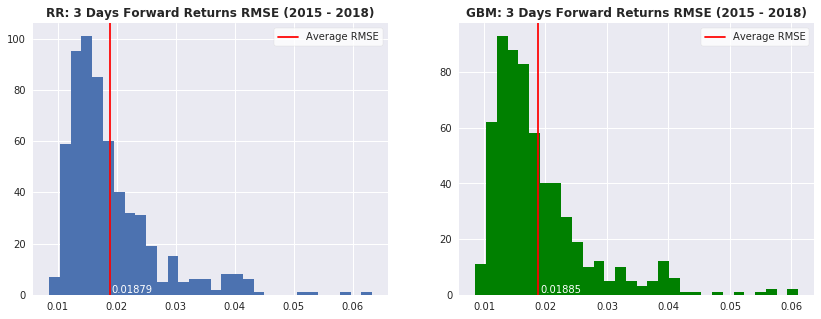

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rmse_rr = oos_rr['RMSE']
rmse_rr.hist(ax=ax[0], bins=30)
ax[0].set_title("RR: %s RMSE (2015 - 2018)" % return_type, fontweight=700)
ax[0].axvline(rmse_rr.mean(), color='red', label="Average RMSE")
ax[0].annotate('%.5f' % rmse_rr.mean(), xy=(rmse_rr.mean(), 0), 
               xytext=(2, 2), textcoords='offset points',color='w')
ax[0].legend()

rmse_gbm = oos_gbm['RMSE']
rmse_gbm.hist(ax=ax[1], bins=30, color='green')
ax[1].set_title("GBM: %s RMSE (2015 - 2018)" % return_type, fontweight=700)
ax[1].axvline(rmse_gbm.mean(), color='red', label="Average RMSE")
ax[1].annotate('%.5f' % rmse_gbm.mean(), xy=(rmse_gbm.mean(), 0), 
               xytext=(2, 2), textcoords='offset points',color='w')
ax[1].legend()

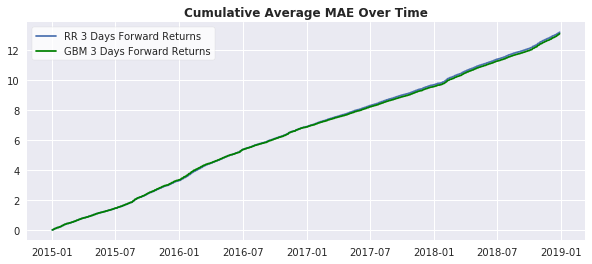

In [19]:
rolling_gbm = res_gbm_daily["Rolling_OOS"].drop(outliers, axis=1)
rolling_rr = res_RR_daily["Rolling_OOS"].drop(outliers, axis=1)
fig, ax = plt.subplots(1,1, figsize=(10,4))

ax.set_title('Cumulative Average MAE Over Time', fontweight=700)

l1, = ax.plot(rolling_rr.mean(1))
l2, = ax.plot(rolling_gbm.mean(1), color='green')

ax.legend((l1, l2), ('RR %s' % return_type, 'GBM %s' % return_type))